In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_breast_cancer

In [2]:
# import and process the data
X,Y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# reshape the targets to (N,1) to specify 1 target, features already in the shape of (N,D) where N is the number of samples and D is the number of features
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# convert everything to pytorch tensor (float32)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [3]:
# Specify the input and output shape
D1, D2 = X_train.shape[1], y_train.shape[1] # D1 is the number of features for input and D2 is the number of targets for output

# initalize the model
model = nn.Sequential(
    nn.Linear(D1,D2),
    nn.Sigmoid() # apply sigmoid activation function in order to receive probabilities
)
# declare the cost function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [4]:
# Training phase
n_epochs = 200
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
  # forward propagation
  train_outputs = model(X_train)
  train_loss = criterion(train_outputs, y_train)

  # backprop
  train_loss.backward()
  optimizer.step()
  optimizer.zero_grad()

    #

  # predict test data and calculate the loss
  test_outputs = model(X_test)
  test_loss = criterion(test_outputs, y_test)

  # keep the losses in order to plot them after training
  test_losses[i] = test_loss.item()
  train_losses[i] = train_loss.item()

  if ( (i+1) % 50 == 0):
    print(f"Epoch {i+1}/{n_epochs}, train_loss: {train_loss.item():.4f}, test_loss: {test_loss.item():.4f}")

Epoch 50/200, train_loss: 0.1432, test_loss: 0.1393
Epoch 100/200, train_loss: 0.1043, test_loss: 0.1059
Epoch 150/200, train_loss: 0.0885, test_loss: 0.0919
Epoch 200/200, train_loss: 0.0795, test_loss: 0.0838


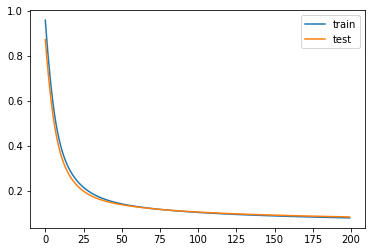

In [5]:
# plot the losses
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
plt.legend()
plt.show()

In [6]:
# calculate accuracies
with torch.no_grad():
  train_predictions = np.round(model(X_train).numpy())
  train_accuracy = (train_predictions == y_train.numpy()).sum() / train_predictions.shape[0]
  test_predictions = np.round(model(X_test).numpy())
  test_accuracy = (test_predictions == y_test.numpy()).sum() / test_predictions.shape[0]
  print(f"Prediction accuracy for train and training sets: %{train_accuracy * 100:.3f} | %{test_accuracy * 100:.3f}")

Prediction accuracy for train and training sets: %98.425 | %97.872
